# Assignment Ch. 5 - Computer Vision [Case #1]
Startup Campus, Indonesia - `Artificial Intelligence Track`
* Dataset: -
* Libraries: Scikit-image, OpenCV, Numpy, Matplotlib
* Objective: Digital Image Processing

`PREREQUISITE` All modules (with their suitable versions) are installed properly.
<br>`TASK` Complete the notebook cell's code marked with <b>#TODO</b> comment.
<br>`TARGET PORTFOLIO` Students are able to replicate the image enhancement algorithm commonly (and recently) used in smartphone companies.
<br>`WARNING` Do **NOT CHANGE** any codes within the User-defined Functions (UDFs) section.

### Case Study Description
As of July 2023, both Apple and Samsung lead the smartphone industry worldwide, with a combined 52.61% of the total market share [(ref1)](https://www.oberlo.com/statistics/smartphone-market-share). As the main feature that must be present on today's smartphones, Apple and Samsung are competing to create camera technology so you can capture your best photo even in the low light condition.
- In September 2019, Apple introduced **Deep Fusion** technology (via the iPhone 11 series) to tackle the challenge. Its upgrade, named **Photonic Engine**, was introduced in September 2022 via the new iPhone 14 series [(ref2)](https://www.youtube.com/watch?v=ux6zXguiqxM&t=4784s&ab_channel=Apple).
- In February 2023, Samsung introduced **Adaptive Tetra-squared Pixel Sensor** technology with the Samsung S23 series as a counter-solution to a similar problem, promising excellent bright photo results from dark-toned images [(ref3)](https://www.youtube.com/watch?v=gUM2wYKdxDA&t=742s&ab_channel=Samsung).

At its core, both technologies work by combining several adjacent pixels into a single pixel, using a **Max Pooling** operation. In this case, you are challenged to replicate the concept (brighten dark-toned photos), and then compare the result with another approach, i.e., **Contrast Limited Adaptive Histogram Equation (CLAHE)**.

[KLIK UNTUK TERJEMAHKAN TEKS](https://translate.google.com/?hl=id&ie=UTF-8&sl=en&tl=id&text=As%20of%20July%202023%2C%20both%20Apple%20and%20Samsung%20lead%20the%20smartphone%20industry%20worldwide%2C%20with%20a%20combined%2052.61%25%20of%20the%20total%20market%20share%20(ref1).%20As%20the%20main%20feature%20that%20must%20be%20present%20on%20today%27s%20smartphones%2C%20Apple%20and%20Samsung%20are%20competing%20to%20create%20camera%20technology%20so%20you%20can%20capture%20your%20best%20photo%20even%20in%20the%20low%20light%20condition.%0A%0A-%20In%20September%202019%2C%20Apple%20introduced%20Deep%20Fusion%20technology%20(via%20the%20iPhone%2011%20series)%20to%20tackle%20the%20challenge.%20Its%20upgrade%2C%20named%20Photonic%20Engine%2C%20was%20introduced%20in%20September%202022%20via%20the%20new%20iPhone%2014%20series%20(ref2).%0A%0A-%20In%20February%202023%2C%20Samsung%20introduced%20Adaptive%20Tetra-squared%20Pixel%20Sensor%20technology%20with%20the%20Samsung%20S23%20series%20as%20a%20counter-solution%20to%20a%20similar%20problem%2C%20promising%20excellent%20bright%20photo%20results%20from%20dark-toned%20images%20(ref3).%0A%0AAt%20its%20core%2C%20both%20technologies%20work%20by%20combining%20several%20adjacent%20pixels%20into%20a%20single%20pixel%2C%20using%20a%20Max%20Pooling%20operation.%20In%20this%20case%2C%20you%20are%20challenged%20to%20replicate%20the%20concept%20(brighten%20dark-toned%20photos)%2C%20and%20then%20compare%20the%20result%20with%20another%20approach%2C%20i.e.%2C%20Contrast%20Limited%20Adaptive%20Histogram%20Equation%20(CLAHE).&op=translate)

### Import libraries

In [ ]:
import numpy as np, cv2
from skimage.io import imsave
from skimage.measure import block_reduce
from torch.nn import MaxPool2d
from torch import from_numpy
from matplotlib import pyplot as plt
from matplotlib.image import imread

### User-defined Functions (UDFs)

In [ ]:
def plot(
    imgs : list,
    titles : list = ["ORIGINAL", "EDITED"],
    figsize : tuple = (8, 5),
    cmaps : list = [None, None],
    *args, **kwargs
) -> None:

    if len(imgs) > 3:
        raise ValueError("Max. total image = 3.")

    if len(imgs) != len(titles):
        raise ValueError("'imgs' should be in the same length with 'titles'.")

    my_figure = plt.figure(figsize=figsize)
    # NOTE: figsize=(width/horizontally, height/vertically)

    fig_ids = [121, 122] if len(imgs) == 2 else [131, 132, 133]

    for idx, img, title, c in zip(fig_ids, imgs, titles, cmaps):
        m = my_figure.add_subplot(idx)
        plt.imshow(img, cmap=c)
        plt.axis("off")
        plt.title(title)

    plt.tight_layout()

In [ ]:
def apply_clahe_rgb(img, clipLimit=2, tileGridSize=(10, 10)):
    # LAB color model where L = Lightness, a = green-red, b = blue-yellow
    light, a, b = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB)) # convert to LAB color model
    light_clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize).apply(light) # apply CLAHE for lightness (L) component only
    return cv2.cvtColor(cv2.merge((light_clahe, a, b)), cv2.COLOR_LAB2BGR) # return with reconvert to BGR color model

### Load dataset
Do NOT forget to upload "photo1.jpeg" and "lena.png" to the Google Collab files.

In [ ]:
img = imread("photo1.jpeg")

In [ ]:
lena = cv2.imread("lena.png")

### Warm Up: Image processing (exploration using OpenCV)

* Color image -> Grayscale image

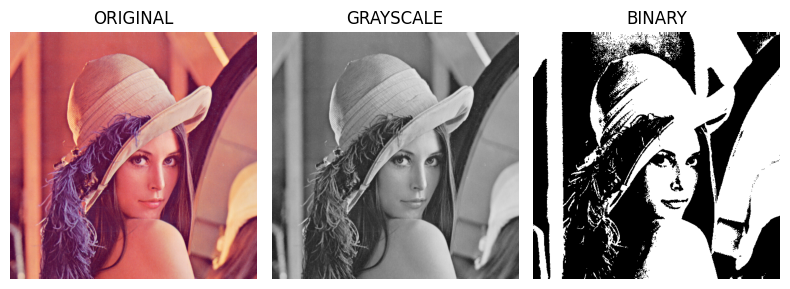

In [ ]:
# original image
img_lena = cv2.imread("lena.png")  # Load the image

# Convert BGR to RGB
img_lena_rgb = cv2.cvtColor(img_lena, cv2.COLOR_BGR2RGB)

# Convert RGB to Grayscale
img_grayscaled = cv2.cvtColor(img_lena_rgb, cv2.COLOR_RGB2GRAY)

# Convert Grayscale to RGB
img_grayscaled_rgb = cv2.cvtColor(img_grayscaled, cv2.COLOR_GRAY2RGB)

# grayscaled image to binary image
_, img_binary = cv2.threshold(img_grayscaled, 128, 255, cv2.THRESH_BINARY)

# plot both
plot(imgs=[img_lena_rgb, img_grayscaled_rgb, img_binary], titles=["ORIGINAL", "GRAYSCALE", "BINARY"], cmaps=[None, None, "gray"])



* Check their histograms

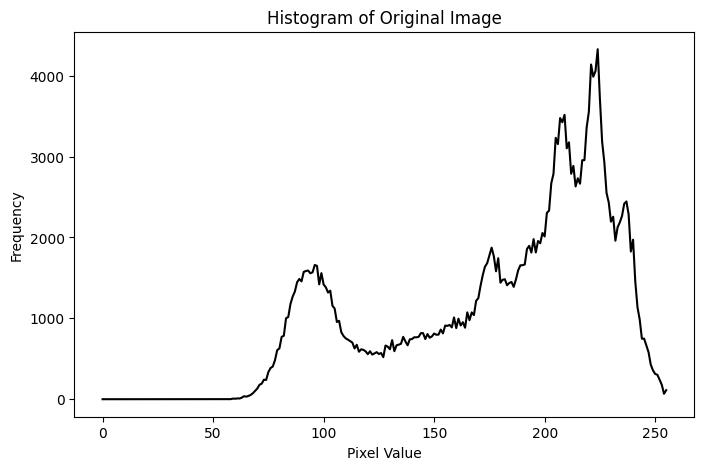

In [ ]:
# TODO: Plot the histogram from the original image

# Calculate the histogram
hist = cv2.calcHist([img_lena_rgb], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist, color="black")

# Show the histogram
plt.show()

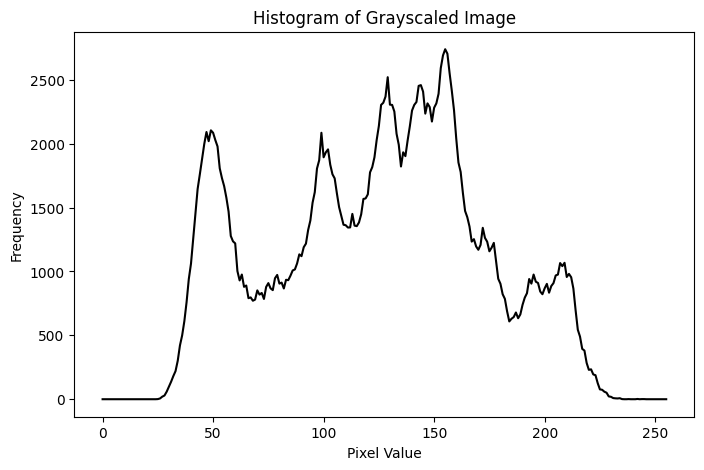

In [ ]:
# TODO: Plot the histogram from the grayscaled image

# Calculate the histogram from the grayscaled image
hist_grayscale = cv2.calcHist([img_grayscaled], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.title("Histogram of Grayscaled Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_grayscale, color="black")

# Show the histogram
plt.show()


### Max Pooling (using Scikit-image)

In [ ]:
BLOCK_SIZE = (4, 4, 1)

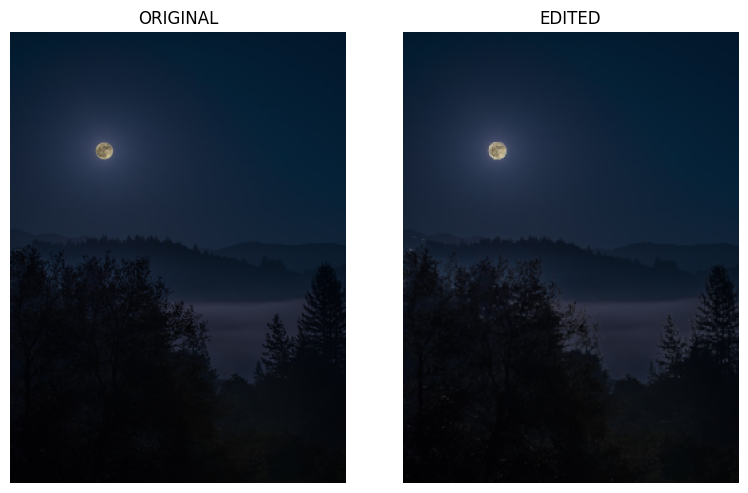

In [ ]:
img_edited = block_reduce(img, block_size=BLOCK_SIZE, func=np.max)
plot(imgs=[img, img_edited])

### Max Pooling (using PyTorch)

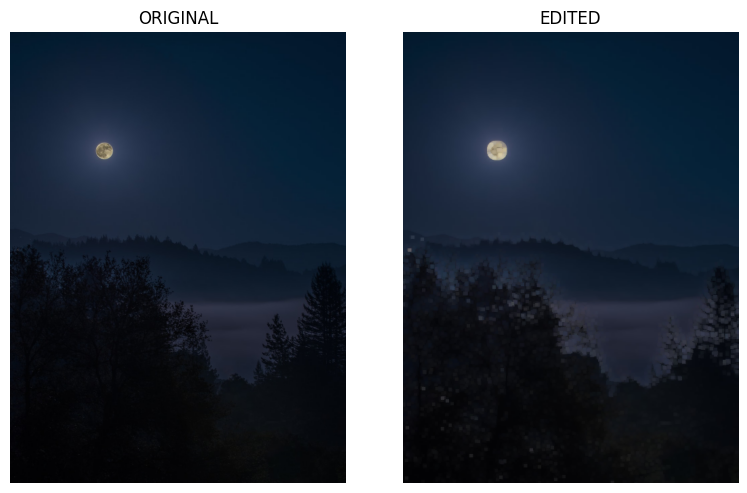

In [ ]:
# convert numpy-based image to torch.Tensor type
img_torch = from_numpy(img).permute(2, 0, 1).float()

# prepare Max Pooling operation from PyTorch
max_pooling = MaxPool2d(kernel_size=9, stride=2)

# perform Max Pooling operation
img_torch_edited = max_pooling(img_torch).permute(1, 2, 0).int().numpy()
plot(imgs=[img, img_torch_edited])

In [ ]:
# QUESTIONS
# TODO: What does PyTorch offer in its Max Pooling operation compared to Scikit-image?

PyTorch menawarkan lebih banyak fleksibilitas dan kontrol dalam operasi Max Pooling dibandingkan dengan Scikit-image. Berikut beberapa perbedaan dan keunggulan operasi Max Pooling PyTorch:

Integrasi dengan Jaringan Saraf: PyTorch adalah kerangka kerja pembelajaran mendalam, dan operasi Max Pooling-nya dirancang untuk berintegrasi dengan lancar dalam jaringan saraf. Ini berarti Anda dapat dengan mudah memasukkan lapisan Max Pooling ke dalam arsitektur jaringan saraf Anda, menjadikannya pilihan yang lebih disukai untuk tugas seperti klasifikasi gambar, deteksi objek, dan lainnya.

Dukungan Backpropagation: PyTorch menyediakan diferensiasi otomatis, yang memungkinkan Anda melakukan backpropagation dan mengoptimalkan operasi Max Pooling selama pelatihan. Ini sangat penting untuk menyesuaikan parameter filter dan meningkatkan kinerja model.

Kustomisasi: PyTorch memungkinkan Anda menyesuaikan berbagai aspek Max Pooling, seperti ukuran kernel, stride, dan padding, sesuai dengan kebutuhan spesifik Anda. Anda memiliki kontrol yang sangat baik atas hiperparameter ini, memungkinkan Anda merancang operasi pooling yang optimal untuk tugas tertentu.

Akselerasi GPU: PyTorch diakselerasi GPU, yang berarti operasi Max Pooling dapat dilakukan di GPU, menghasilkan perhitungan yang jauh lebih cepat untuk dataset besar dan model yang kompleks.

Grafik Perhitungan Dinamis: PyTorch menggunakan grafik perhitungan dinamis, yang berarti operasi Max Pooling dapat didefinisikan dan disesuaikan secara dinamis, menjadikannya lebih mudah beradaptasi dengan berbagai arsitektur jaringan dan ukuran input.

### Min Pooling and Average Pooling

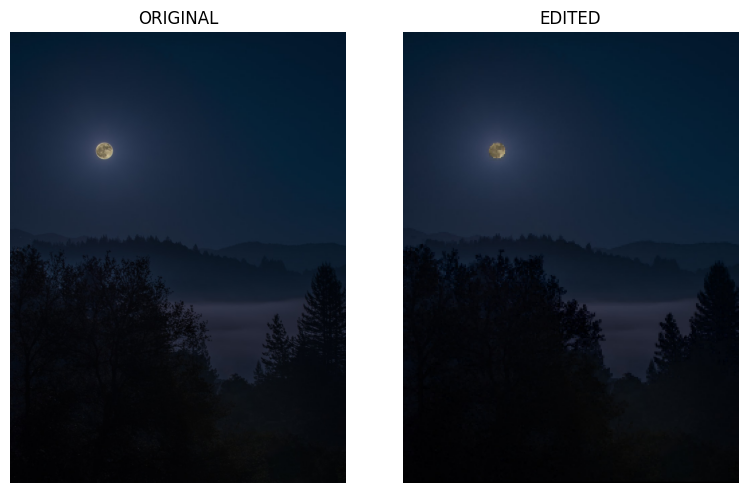

In [ ]:
img_edited_min = block_reduce(img, block_size=BLOCK_SIZE, func=np.min)
plot(imgs=[img, img_edited_min])

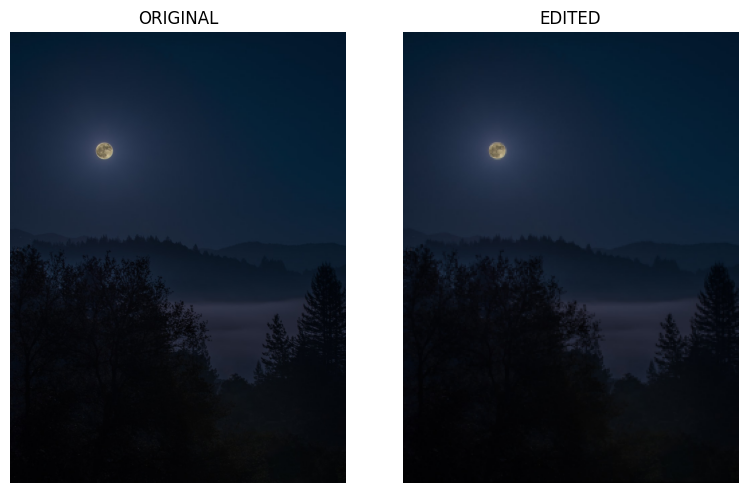

In [ ]:
img_edited_avg = block_reduce(img, block_size=BLOCK_SIZE, func=np.mean)
img_edited_avg = img_edited_avg.astype(int)
plot(imgs=[img, img_edited_avg])

In [ ]:
# QUESTIONS
# TODO: What is the difference between Min Pooling and Average Pooling operations?
# If you cannot see the difference, try with another image or change the BLOCK_SIZE.

Perbedaan antara operasi Min Pooling dan Average Pooling adalah dalam cara mereka memproses dan menghasilkan nilai-nilai keluaran:

Min Pooling (Operasi Penggabungan Minimum):

Min Pooling mengambil nilai minimum dari setiap blok berdasarkan nilai piksel terkecil di dalam blok tersebut.
Hasilnya adalah gambar dengan kontras yang lebih tinggi, di mana fitur paling gelap dari setiap blok dipertahankan.
Cocok untuk menyoroti fitur atau detail dalam gambar yang lebih gelap.
Average Pooling (Operasi Penggabungan Rata-rata):

Average Pooling mengambil rata-rata nilai dari setiap blok, di mana setiap piksel dihitung dalam perhitungan rata-rata.
Hasilnya adalah gambar yang lebih halus dan mengurangi kontras, karena ia menciptakan efek smoothing (pemulusan).
Cocok untuk mengurangi noise dalam gambar dan mempertahankan fitur umum.
Perbedaan utama terletak pada cara pengambilan nilai: Min Pooling memilih piksel terkecil, sedangkan Average Pooling mengambil rata-rata. Jika Anda ingin melihat perbedaannya, Anda dapat mencoba dengan gambar yang berbeda atau mengubah BLOCK_SIZE untuk melihat bagaimana hasilnya berubah. Dengan BLOCK_SIZE yang lebih besar, Anda akan melihat efek rata-rata yang lebih signifikan dalam operasi Average Pooling, sedangkan dengan BLOCK_SIZE yang lebih kecil, efek minimum dalam operasi Min Pooling akan lebih jelas.







### CLAHE
Now imagine you have a better approach to compete Apple's Photonic Engine and Samsung's Adaptive Tetra-squared Pixel technologies using **Contrast Limited Adaptive Histogram Equalization (CLAHE)**. How's the result?

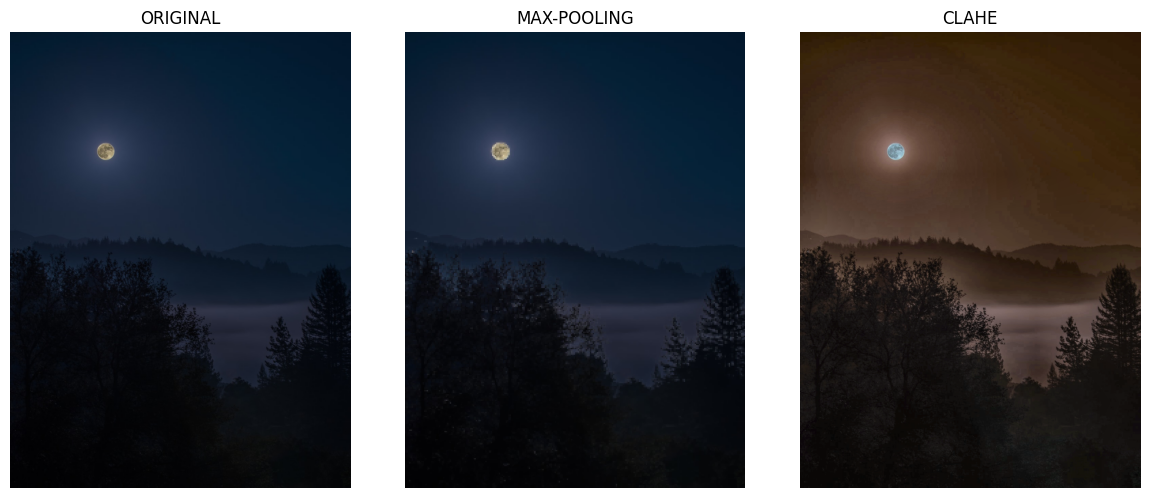

In [ ]:
# img_clahe = ... # TODO: Call the function apply_clahe_rgb() and pass the variable image of "photo1.jpeg"
# plot(imgs=[img, img_edited, img_clahe], titles=["ORIGINAL", "MAX-POOLING", "CLAHE"], figsize=(12, 5), cmaps=[None]*3)

import cv2

# Definisikan fungsi apply_clahe_rgb
def apply_clahe_rgb(image_path, clip_limit=2.0, tile_grid_size=(8, 8)):
    img = cv2.imread(image_path)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    cl = clahe.apply(l)

    limg = cv2.merge((cl, a, b))
    img_clahe = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    return img_clahe

# Path gambar "photo1.jpeg"
image_path = "photo1.jpeg"

# Panggil fungsi apply_clahe_rgb untuk gambar "photo1.jpeg"
img_clahe = apply_clahe_rgb(image_path)

# Plot ketiga gambar bersamaan dengan judulnya
plot(imgs=[img, img_edited, img_clahe], titles=["ORIGINAL", "MAX-POOLING", "CLAHE"], figsize=(12, 5), cmaps=[None] * 3)


In [ ]:
# QUESTIONS
# TODO: What are the advantages of using CLAHE (instead of Max Pooling) to brighten the dark-toned image?

Keuntungan menggunakan CLAHE (Contrast Limited Adaptive Histogram Equalization) dibandingkan dengan Max Pooling untuk mencerahkan gambar dengan tonalitas gelap adalah:

Peningkatan Kontras yang Lebih Seimbang: CLAHE adalah teknik pemulusan yang dirancang untuk meningkatkan kontras secara adaptif. Ini berarti CLAHE dapat mencerahkan gambar dengan tonalitas gelap tanpa kehilangan informasi di daerah dengan tingkat kecerahan yang berbeda. Max Pooling, sementara itu, hanya mempertahankan piksel terang terbaik dan mungkin mengorbankan informasi dalam daerah yang lebih gelap.

Pengendalian Kontras: CLAHE memungkinkan pengendalian yang lebih baik atas tingkat peningkatan kontras. Anda dapat mengatur batasan kontras tertentu dengan parameter seperti clip_limit saat menerapkan CLAHE. Dengan Max Pooling, Anda tidak memiliki kendali semacam itu atas kontras gambar.

Pengurangan Noise: CLAHE cenderung mengurangi noise dalam gambar, membuat gambar yang lebih halus dan lebih enak dilihat. Sementara Max Pooling, dalam beberapa kasus, mungkin tidak memiliki efek serupa terhadap noise dalam gambar.

Pemeliharaan Detail: CLAHE cenderung mempertahankan lebih banyak detail dalam gambar, terutama dalam daerah dengan tingkat kecerahan yang berbeda. Ini penting jika detail tersebut penting dalam analisis atau pemrosesan lebih lanjut.

Adaptif: CLAHE secara adaptif menyesuaikan peningkatan kontras dengan kondisi lokal dalam gambar. Ini berarti kontras ditingkatkan dengan cara yang lebih cerdas dan lebih baik sesuai dengan konteks lokal dalam gambar.

Oleh karena itu, CLAHE lebih cocok untuk tugas mencerahkan gambar dengan tonalitas gelap dan mempertahankan informasi yang berharga dalam gambar. Max Pooling, di sisi lain, lebih cocok untuk tugas pemampatan dan pengambilan fitur dalam konteks jaringan saraf tiruan dan pengolahan citra lebih lanjut.

### Save your edited image

In [ ]:
# FILE_NAME = ... # TODO: Give any file name to your new CLAHE-enhanced photo, ends with .png extension
# imsave(fname=FILE_NAME, arr=img_clahe)

# Nama file yang diinginkan dengan ekstensi .png
FILE_NAME = "hasil_clahe.png"

# Simpan gambar yang sudah ditingkatkan dengan CLAHE
imsave(FILE_NAME, img_clahe)


### Scoring
Total `#TODO` = 12
<br>Checklist:

- [ ] Change the color channel from BGR to RGB using cv2.COLOR_BGR2RGB
- [ ] Change the color channel from BGR to Grayscale using cv2.COLOR_BGR2GRAY
- [ ] Change the color channel from Grayscale to Binary using cv2.THRESH_BINARY
- [ ] Plot the histogram from the original image
- [ ] Plot the histogram from the grayscaled image
- [ ] QUESTION: What does PyTorch offer in its Max Pooling operation compared to Scikit-image?
- [ ] Recall the block_reduce(), but with func=np.min
- [ ] Recall the block_reduce().astype(int), but with func=np.mean
- [ ] What is the difference between Min Pooling and Average Pooling operations?
- [ ] Call the function apply_clahe_rgb() and pass the variable image of "photo1.jpeg"
- [ ] QUESTION: What are the advantages of using CLAHE (instead of Max Pooling) to brighten the dark-toned image?
- [ ] Give any file name to your new CLAHE-enhanced photo, ends with .png extension

### Additional readings
* https://medium.com/@bdhuma/which-pooling-method-is-better-maxpooling-vs-minpooling-vs-average-pooling-95fb03f45a9

### Copyright © 2023 Startup Campus, Indonesia
* You may **NOT** use this file except there is written permission from PT. Kampus Merdeka Belajar (Startup Campus).
* Please address your questions to mentors.